# Multiple Linear Regression
## Car Assignment

#### Problem Statement:


- To identify the variables affecting car prices.

- To create a linear model that quantitatively relates car prices with variables 

- To know the accuracy of the model, i.e. how well these variables can predict house prices.



In [1989]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the data

In [1990]:
cardf = pd.read_csv("CarPrice_Assignment.csv")

print(cardf.head())
print(cardf.describe())
print(cardf.shape)
print(cardf.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  engi

# Step 2: Visualizing the data

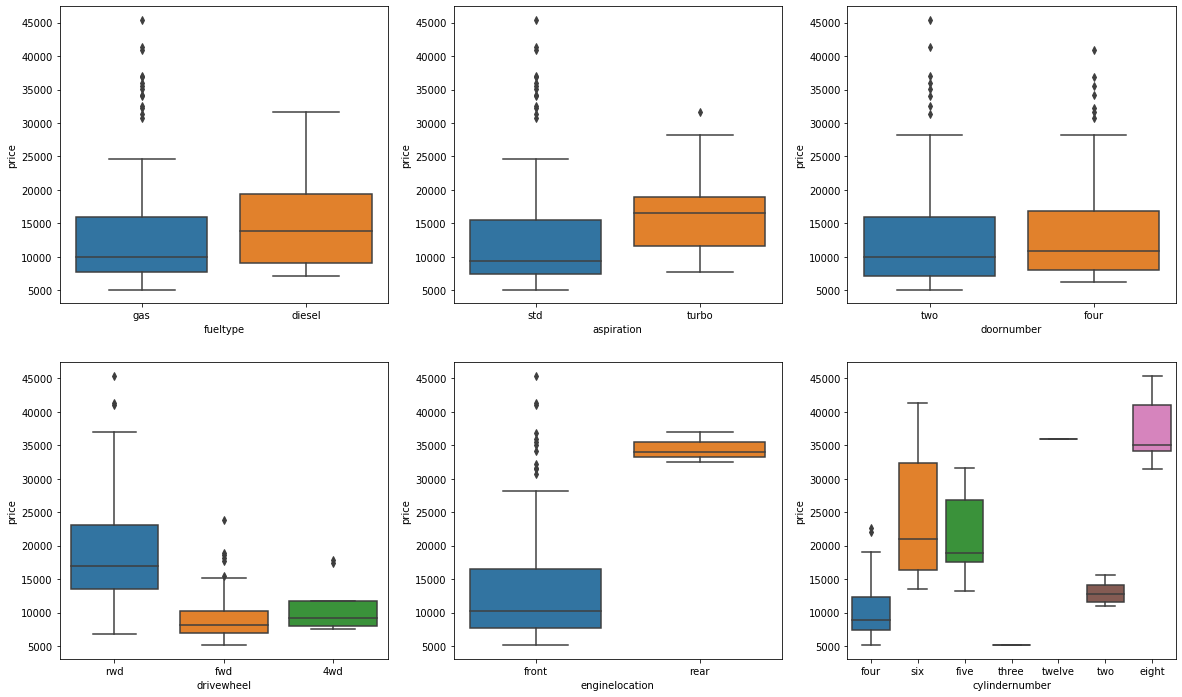

In [1991]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardf)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cardf)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cardf)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardf)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardf)
plt.subplot(2,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardf)

plt.show()

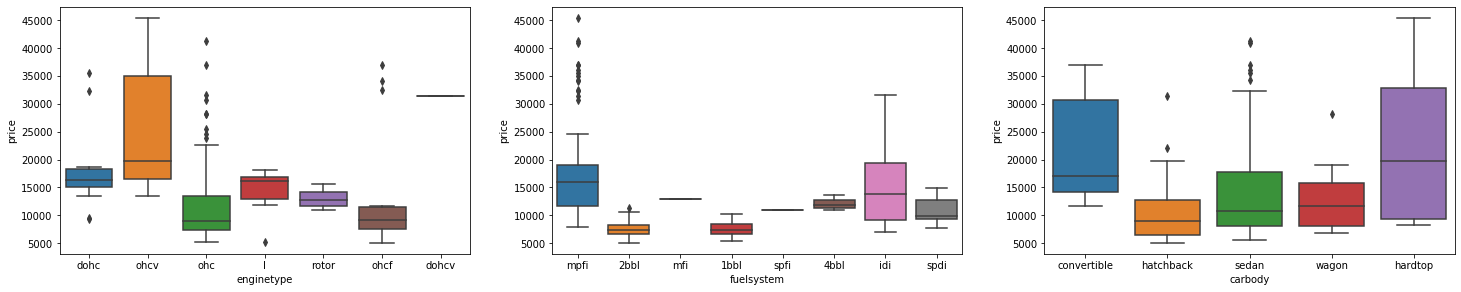

In [1992]:
plt.figure(figsize = (25,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = cardf)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardf)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cardf)
plt.show()

## Step 3: Data Preparation



In [1993]:
#Step 3 Data Preparation
# Defining the map function
cardf['Company'] = cardf['CarName'].str.split(' ', n = 1, expand = True)[0]
cardf['Company']= cardf['Company'].replace('maxda', "mazda") 
cardf['Company']= cardf['Company'].replace('nissan', "Nissan") 

cardf['Company']= cardf['Company'].replace('porcshce' , 'porsche') 
cardf['Company']= cardf['Company'].replace('toyouta' , "toyota") 
cardf['Company']= cardf['Company'].replace('vokswagen'  , 'volkswagen') 
cardf['Company']= cardf['Company'].replace('vw' , 'volkswagen') 


print(cardf['Company'] .unique())

# Defining the map function
def binary_map_cylindernumber(x):
    return x.map({'four': 4, 'six': 6, 'five': 5, 'two':2, 'three':3, 'four': 4, 'eight':8, 'twelve':12})
cardf[['cylindernumber']] = cardf[['cylindernumber']].apply(binary_map_cylindernumber) 


def binary_map_symboling(x):
    return x.map({-1: 2, -2: 1, 0: 3, 1:4, 2:5, 3:6 })
cardf[['symboling']] = cardf[['symboling']].apply(binary_map_symboling) 
cardf.head()


# Defining the map function
def binary_map_doornumber(x):
    return x.map({'two': 1, "four": 2})

cardf[['doornumber']] = cardf[['doornumber']].apply(binary_map_doornumber)


def binary_map_enginelocation(x):
    return x.map({'front': 1, "rear": 2})
cardf[['enginelocation']] = cardf[['enginelocation']].apply(binary_map_enginelocation)

# Defining the map function
def binary_map_aspiration(x):
    return x.map({'std': 1, 'turbo': 0})
cardf[['aspiration']] = cardf[['aspiration']].apply(binary_map_aspiration) 
           

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [1994]:
#def binary_map_fuletype(x):
#    return x.map({'gas': 1, 'diesel': 0})
# Applying the function to the housing list
#cardf[['fueltype']] = cardf[['fueltype']].apply(binary_map_fuletype)

# Defining the map function
#def binary_map_aspiration(x):
#    return x.map({'std': 1, 'turbo': 0})
#cardf[['aspiration']] = cardf[['aspiration']].apply(binary_map_aspiration) 

fuel_type = pd.get_dummies(cardf['fueltype'], drop_first = True)
cardf = pd.concat([cardf, fuel_type], axis = 1)


fuel_system = pd.get_dummies(cardf['fuelsystem'], drop_first = True)
cardf = pd.concat([cardf, fuel_system], axis = 1)

#aspiration_type = pd.get_dummies(cardf['aspiration'], drop_first = True)
#cardf = pd.concat([cardf, aspiration_type], axis = 1)


drivewheel_type = pd.get_dummies(cardf['drivewheel'], drop_first = True)
cardf = pd.concat([cardf, drivewheel_type], axis = 1)



car_body = pd.get_dummies(cardf['carbody'], drop_first = True)
cardf = pd.concat([cardf, car_body], axis = 1)



car_Company = pd.get_dummies(cardf['Company'], drop_first = True)
cardf = pd.concat([cardf, car_Company], axis = 1)


cardf.head(200)

car_ID  symboling                          CarName fueltype  aspiration  \
0         1          6               alfa-romero giulia      gas           1   
1         2          6              alfa-romero stelvio      gas           1   
2         3          4         alfa-romero Quadrifoglio      gas           1   
3         4          5                      audi 100 ls      gas           1   
4         5          5                       audi 100ls      gas           1   
5         6          5                         audi fox      gas           1   
6         7          4                       audi 100ls      gas           1   
7         8          4                        audi 5000      gas           1   
8         9          4                        audi 4000      gas           0   
9        10          3              audi 5000s (diesel)      gas           0   
10       11          5                         bmw 320i      gas           1   
11       12          3                         bmw 320i      gas           1   
12       13          3                           bmw x1      gas           1   
13       14          3                           bmw x3      gas           1   
14       15          4                           bmw z4      gas           1   
15       16          3                           bmw x4      gas           1   
16       17          3                           bmw x5      gas           1   
17       18          3                           bmw x3      gas           1   
18       19          5                 chevrolet impala      gas           1   
19       20          4            chevrolet monte carlo      gas           1   
20       21          3              chevrolet vega 2300      gas           1   
21       22          4                    dodge rampage      gas           1   
22       23          4              dodge challenger se      gas           1   
23       24          4                       dodge d200      gas           0   
24       25          4                dodge monaco (sw)      gas           1   
25       26          4               dodge colt hardtop      gas           1   
26       27          4                  dodge colt (sw)      gas           1   
27       28          4             dodge coronet custom      gas           0   
28       29          2                dodge dart custom      gas           1   
29       30          6        dodge coronet custom (sw)      gas           0   
30       31          5                      honda civic      gas           1   
31       32          5                 honda civic cvcc      gas           1   
32       33          4                      honda civic      gas           1   
33       34          4                honda accord cvcc      gas           1   
34       35          4                 honda civic cvcc      gas           1   
35       36          3                  honda accord lx      gas           1   
36       37          3              honda civic 1500 gl      gas           1   
37       38          3                     honda accord      gas           1   
38       39          3                 honda civic 1300      gas           1   
39       40          3                    honda prelude      gas           1   
40       41          3                     honda accord      gas           1   
41       42          3                      honda civic      gas           1   
42       43          4               honda civic (auto)      gas           1   
43       44          3                       isuzu MU-X      gas           1   
44       45          4                     isuzu D-Max       gas           1   
45       46          3              isuzu D-Max V-Cross      gas           1   
46       47          5                     isuzu D-Max       gas           1   
47       48          3                        jaguar xj      gas           1   
48       49          3                        jaguar xf      gas           1   
49   

In [1995]:
cardf.drop(['carbody'], axis = 1, inplace = True)
cardf.drop(['drivewheel'], axis = 1, inplace = True)
#cardf.drop(['cylindernumber'], axis = 1, inplace = True)
cardf.drop(['fuelsystem'], axis = 1, inplace = True)
cardf.drop(['fueltype'], axis = 1, inplace = True)
cardf.drop(['enginetype'], axis = 1, inplace = True)
cardf.drop(['CarName'], axis = 1, inplace = True)
#cardf.drop(['symboling'], axis = 1, inplace = True)
cardf.drop(['Company'], axis = 1, inplace = True)

In [1996]:
cardf.head(200)

car_ID  symboling  aspiration  doornumber  enginelocation  wheelbase  \
0         1          6           1           1               1       88.6   
1         2          6           1           1               1       88.6   
2         3          4           1           1               1       94.5   
3         4          5           1           2               1       99.8   
4         5          5           1           2               1       99.4   
5         6          5           1           1               1       99.8   
6         7          4           1           2               1      105.8   
7         8          4           1           2               1      105.8   
8         9          4           0           2               1      105.8   
9        10          3           0           1               1       99.5   
10       11          5           1           1               1      101.2   
11       12          3           1           2               1      101.2   
12       13          3           1           1               1      101.2   
13       14          3           1           2               1      101.2   
14       15          4           1           2               1      103.5   
15       16          3           1           2               1      103.5   
16       17          3           1           1               1      103.5   
17       18          3           1           2               1      110.0   
18       19          5           1           1               1       88.4   
19       20          4           1           1               1       94.5   
20       21          3           1           2               1       94.5   
21       22          4           1           1               1       93.7   
22       23          4           1           1               1       93.7   
23       24          4           0           1               1       93.7   
24       25          4           1           2               1       93.7   
25       26          4           1           2               1       93.7   
26       27          4           1           2               1       93.7   
27       28          4           0           1               1       93.7   
28       29          2           1           2               1      103.3   
29       30          6           0           1               1       95.9   
30       31          5           1           1               1       86.6   
31       32          5           1           1               1       86.6   
32       33          4           1           1               1       93.7   
33       34          4           1           1               1       93.7   
34       35          4           1           1               1       93.7   
35       36          3           1           2               1       96.5   
36       37          3           1           2               1       96.5   
37       38          3           1           1               1       96.5   
38       39          3           1           1               1       96.5   
39       40          3           1           2               1       96.5   
40       41          3           1           2               1       96.5   
41       42          3           1           2               1       96.5   
42       43          4           1           1               1       96.5   
43       44          3           1           2               1       94.3   
44       45          4           1           1               1       94.5   
45       46          3           1           2               1       94.5   
46       47          5           1           1               1       96.0   
47       48          3           1           2               1      113.0   
48       49          3           1           2               1      113.0   
49       50          3           1           1               1      102.0   
50       51          4           1           1               1       93.1   
5

## Step 4: Splitting the Data into Training and Testing Sets

In [1997]:
#Step 4: Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cardf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1998]:
from sklearn.preprocessing import MinMaxScaler
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize' ,'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price','cylindernumber','symboling']
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

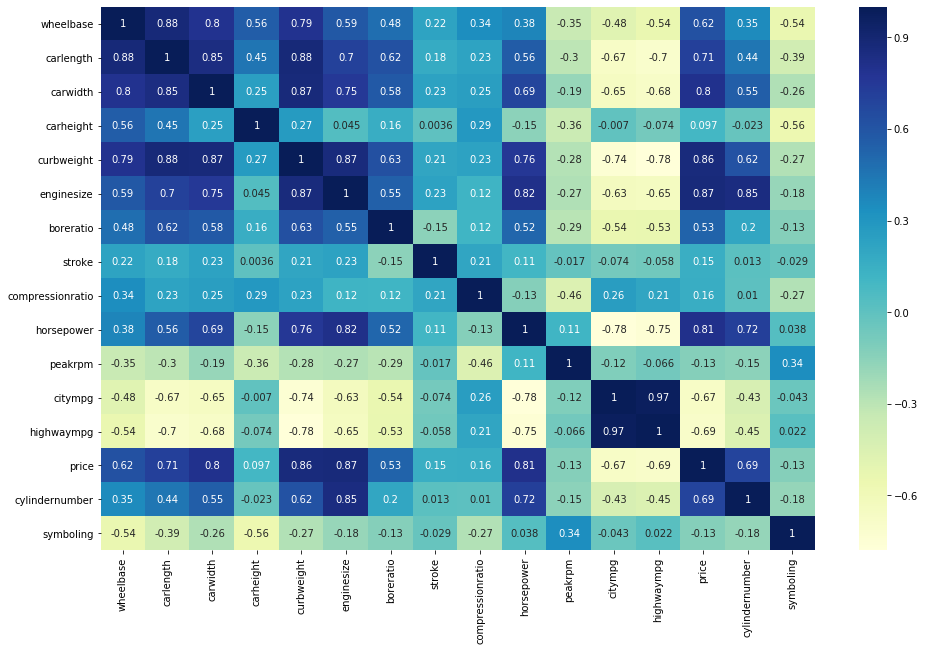

In [1999]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df_train.head()
testf = df_train[num_vars]
testf.corr(method=histogram_intersection)



plt.figure(figsize = (16, 10))
sns.heatmap(testf.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [2000]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

In [2001]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('car_ID', False, 41),
 ('symboling', False, 40),
 ('aspiration', False, 25),
 ('doornumber', False, 42),
 ('enginelocation', True, 1),
 ('wheelbase', False, 16),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 21),
 ('citympg', False, 32),
 ('highwaympg', False, 20),
 ('gas', False, 7),
 ('2bbl', False, 35),
 ('4bbl', False, 34),
 ('idi', False, 6),
 ('mfi', False, 43),
 ('mpfi', False, 24),
 ('spdi', False, 26),
 ('spfi', False, 45),
 ('fwd', False, 31),
 ('rwd', False, 33),
 ('hardtop', False, 15),
 ('hatchback', False, 12),
 ('sedan', False, 14),
 ('wagon', False, 13),
 ('alfa-romero', False, 39),
 ('audi', False, 23),
 ('bmw', True, 1),
 ('buick', False, 2),
 ('chevrolet', False, 27),
 ('dodge', False, 18),
 ('honda', False, 22),
 ('isuzu', False

In [2002]:

col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'bmw', 'porsche'],
      dtype='object')

In [2003]:
#enginelocation
#car width
#curbweight
#enginesize
#cylindernumber
#company


import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[[ 'enginesize','enginelocation',  'bmw', 'porsche', 'curbweight']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.36e-60
Time:                        13:10:17   Log-Likelihood:                 166.04
No. Observations:                 143   AIC:                            -320.1
Df Residuals:                     137   BIC:                            -302.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3662      0.097     -3.

In [2004]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0           const  226.32
1      enginesize    4.40
5      curbweight    4.14
4         porsche    1.53
2  enginelocation    1.52
3             bmw    1.07

Text(0.5, 0, 'Errors')

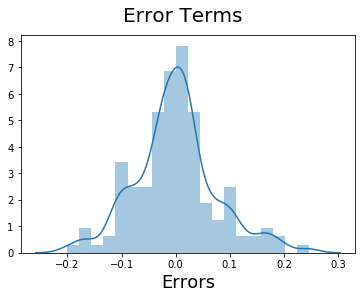

In [2005]:
y_train_price = lr.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2006]:
#Step 8: Making Predictions Using the Final Model
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

num_vars =  ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize' ,'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price','cylindernumber','symboling']
scaler = MinMaxScaler()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [2007]:
y_test = df_test.pop('price')
X_test = df_test

In [2008]:
#'carwidth', 'enginesize','enginelocation','three', 'two', 'twelve','boreratio','bmw', 'porsche'

X_test_m1 = sm.add_constant(X_test[[ 'enginesize','enginelocation', 'bmw', 'porsche', 'curbweight']])
#X_test_m1 = X_test_m4[['carwidth', 'curbweight','enginesize','enginelocation', 'boreratio','three', 'twelve', 'two', 'bmw', 'porsche']]
X_test_m1.head()


const  enginesize  enginelocation  bmw  porsche  curbweight
160    1.0    0.082969               1    0        0    0.132148
186    1.0    0.131004               1    0        0    0.219125
59     1.0    0.187773               1    0        0    0.271985
165    1.0    0.082969               1    0        0    0.214320
140    1.0    0.126638               1    0        0    0.202307

In [2009]:
y_pred_m1 = lr.predict(X_test_m1)
y_pred_m1.head()

160   -0.016519
186    0.052140
59     0.105987
165    0.028399
140    0.041026
dtype: float64

Text(0.5, 0, 'Errors')

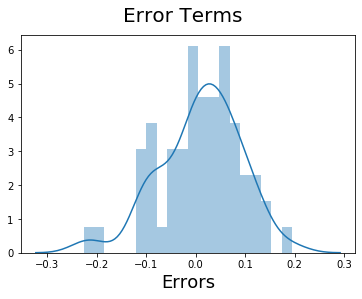

In [2010]:
y_test_price = lr.predict(X_test_m1)
fig = plt.figure()
sns.distplot((y_test - y_test_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

## Step 8: Model Evaluation

In [2011]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m1)

0.8464164530558681

Text(0, 0.5, 'y_pred')

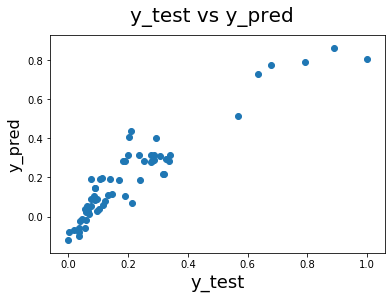

In [2012]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 